In [1]:
#!/usr/bin/env python

'''
DESCRIPTION
-----------
    Encoding information

RETURN
------
    {EXPERIMENT}_enc.png : png file
        graph


EXPORTED FILE(s) LOCATION
-------------------------
    ./models/NN/{EXPERIMENT}/{EXPERIMENT}_enc.png
'''

# importing default libraries
import os, argparse, sys
# sys.path.append('./')
ROOT_DIR = os.path.dirname(os.path.dirname(os.path.abspath('__file__')))
os.chdir(ROOT_DIR)
sys.path.append(ROOT_DIR)
# importing scripts in scripts folder
from scripts import config as src

**** scripts/config.py IMPORTED!!!
**** PROJECT FOLDER ,  /home/pgundogdu/projects/signalization_prior_knowledge_based_nn


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.manifold import TSNE

rand_state=91
TINY_SIZE = 8
SMALL_SIZE = 10
NORMAL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=MEDIUM_SIZE)         # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=12)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=TINY_SIZE)     # fontsize of the tick labels
plt.rc('ytick', labelsize=TINY_SIZE)     # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('legend', title_fontsize=NORMAL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## MELANOMA

In [3]:
src.define_folder('./reports/encoding/exper_melanoma')

PATH created!!
FOLDER information,  ./reports/encoding/exper_melanoma/


'./reports/encoding/exper_melanoma/'

In [4]:
df_query = pd.read_pickle('./data/processed/exper_melanoma/query_log1p.pck')
df_query

,a1bg,a1cf,a2m,a2ml1,a4galt,a4gnt,aaas,aacs,aadac,aadacl2,...,zwint,zxda,zxdb,zxdc,zyg11a,zyg11b,zyx,zzef1,zzz3,cell_type
0,3.292126,0.00000,0.000000,0.000000,0.0,0.0,4.291691,2.209373,0.0,0.0,...,4.599051,0.0,2.819592,2.886475,1.701105,0.438255,3.349202,0.0,0.708036,Neg.cell
1,0.000000,0.00000,7.886006,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,Neg.cell
2,0.000000,0.00000,6.300162,0.000000,0.0,0.0,5.286700,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,2.066863,2.801541,1.358409,0.000000,0.0,0.000000,Neg.cell
3,0.000000,0.00000,6.989400,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,4.495467,0.0,0.000000,2.701361,0.000000,3.999484,0.000000,0.0,3.515121,Neg.cell
4,3.749504,0.00000,0.000000,1.401183,0.0,0.0,1.247032,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.536493,1.488400,1.280934,0.000000,0.0,2.457021,Neg.cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3407,0.000000,1.10194,0.000000,1.719189,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,2.163323,3.173878,2.712706,0.000000,0.0,0.000000,T.CD8
3408,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,4.350923,2.149434,2.594508,0.000000,0.0,0.000000,T.CD8
3409,0.000000,0.00000,0.000000,0.000000,0.0,0.0,5.967223,0.000000,0.0,0.0,...,6.950019,0.0,0.000000,0.000000,0.000000,0.000000,5.598422,0.0,0.000000,T.CD8
3410,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,2.506342,1.278152,2.978586,4.051785,0.0,0.000000,T.CD8


In [5]:
X = df_query.iloc[:, :-1].values
y_ground_truth = df_query.iloc[:, -1:]

print('shape of feature and traget dataset, feature dataset, {0}, target column {1}'.format(X.shape, y_ground_truth.shape))

shape of feature and traget dataset, feature dataset, (3412, 17994), target column (3412, 1)


In [13]:
split = 'train_test_split'
experiment = 'exper_melanoma'

loc_read = os.path.join(src.DIR_MODELS, experiment, split)
for i in glob.glob(os.path.join(loc_read, 'design*_layer_signaling*')):
    print(i)

/home/pgundogdu/projects/signalization_prior_knowledge_based_nn/models/exper_melanoma/train_test_split/design_1_layer_signaling_reference_log1p_Adam.h5
/home/pgundogdu/projects/signalization_prior_knowledge_based_nn/models/exper_melanoma/train_test_split/design_2_layer_signaling_reference_log1p_Adam.h5


Loaded model!! /home/pgundogdu/projects/signalization_prior_knowledge_based_nn/models/exper_melanoma/train_test_split/design_1_layer_signaling_reference_log1p_Adam.h5
Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1_input (InputLayer)    [(None, 17994)]           0         
_________________________________________________________________
layer1 (Dense)               (None, 93)                1673535   
Total params: 1,673,535
Trainable params: 1,673,535
Non-trainable params: 0
_________________________________________________________________
1_layer
Loaded model!! /home/pgundogdu/projects/signalization_prior_knowledge_based_nn/models/exper_melanoma/train_test_split/design_2_layer_signaling_reference_log1p_Adam.h5
Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1_input (InputL

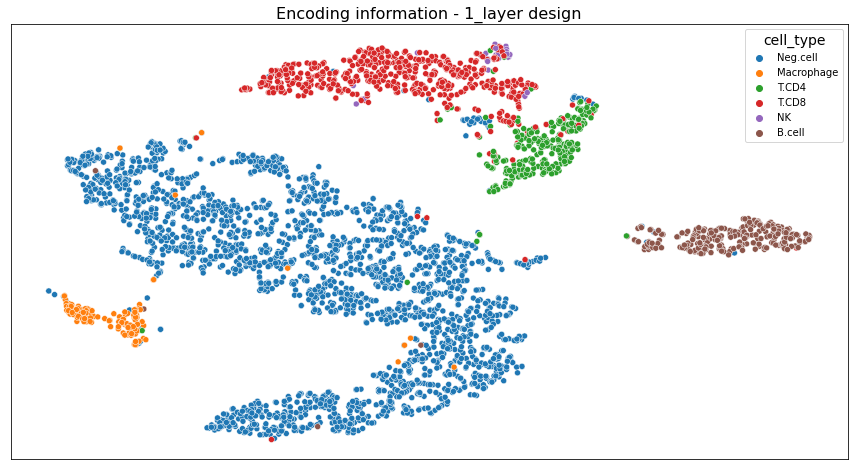

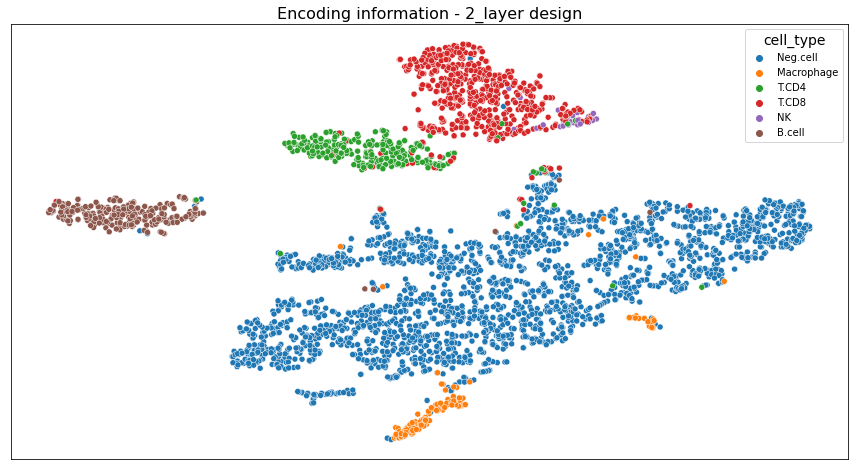

In [16]:
np.random.seed(91)


for i_design in ['1_layer','2_layer']:
    
#     design = 'a1'
    _, model_encoding = src.loading_model( glob.glob(os.path.join(loc_read, 'design_'+i_design+'_signaling*'))[0], -1)
    model_encoding.summary()
    print(i_design)

    encoding = model_encoding.predict(X)
    tsne = TSNE().fit_transform(encoding)

    df_encoding_tsne = pd.concat([pd.DataFrame(tsne, columns=['tsne1', 'tsne2']), y_ground_truth], axis=1)

    plt.figure(figsize=(15,8))
    
    sns.scatterplot(data=df_encoding_tsne, x='tsne1', y='tsne2', hue='cell_type')
    plt.title('Encoding information - '+i_design+' design')
    
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.savefig('./reports/encoding/exper_melanoma/mel_enc_query_'+i_design+'.png', dpi=300, bbox_inches = 'tight')
    plt.savefig('./reports/encoding/exper_melanoma/mel_enc_query_'+i_design+'.pdf', dpi=300, bbox_inches = 'tight')
    plt.savefig('./reports/encoding/exper_melanoma/mel_enc_query_'+i_design+'.svg', dpi=300, bbox_inches = 'tight')
    

In [17]:
del(df_query)
del(df_encoding_tsne)
del(X, y_ground_truth)

## IMMUNE

In [4]:
src.define_folder('./reports/encoding/exper_immune')

FOLDER information,  ./reports/encoding/exper_immune/


'./reports/encoding/exper_immune/'

In [5]:
df_immune = pd.read_pickle('./data/processed/exper_immune/immune_fig3.pck')

X = df_immune.iloc[:, :-1].values
y = df_immune.iloc[:, -1:]
ohe = OneHotEncoder()
y_ohe = ohe.fit_transform(y.values).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=rand_state, stratify=y_ohe)
target_y = pd.concat([y_train, y_test])

Loaded model!! ./models/exper_immune/train_test_split/design_1_layer_signaling_immune_fig3_train_test_split_Adam.h5
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1_input (InputLayer)    [(None, 16900)]           0         
_________________________________________________________________
layer1 (Dense)               (None, 93)                1571793   
Total params: 1,571,793
Trainable params: 1,571,793
Non-trainable params: 0
_________________________________________________________________
a1


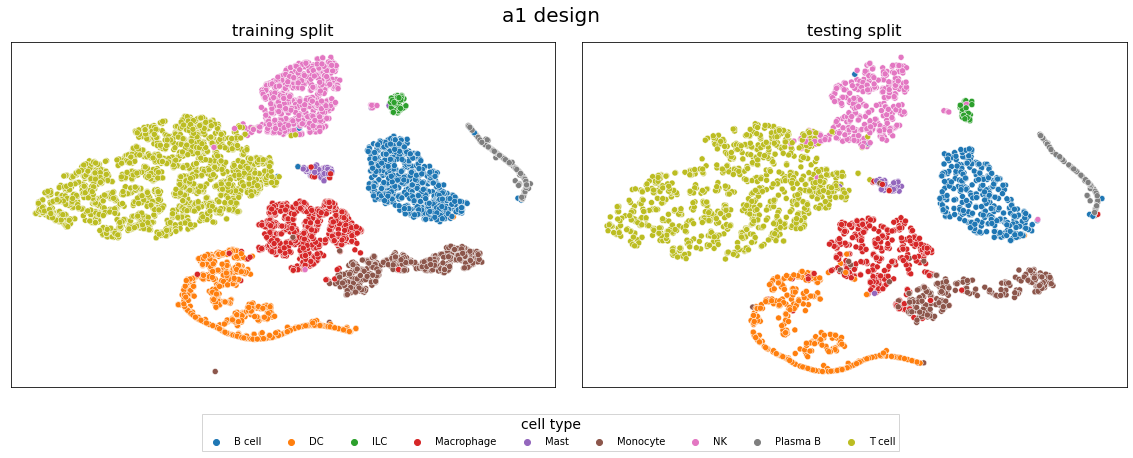

In [9]:
np.random.seed(91)
for i_design in ['a1']:#['a1','a2']:
    
    _, model_encoding = src.loading_model('./models/exper_immune/train_test_split/design_1_layer_signaling_immune_fig3_train_test_split_Adam.h5', -1)
    model_encoding.summary()
    print(i_design)
    
    encoding_train = pd.DataFrame(model_encoding.predict(X_train))
    encoding_train['training_testing']='training'
    encoding_test = pd.DataFrame(model_encoding.predict(X_test))
    encoding_test['training_testing']='testing'
    
    target_y = pd.concat([y_train, y_test])
    
    encoding_comb = pd.concat([encoding_train, encoding_test], axis=0).reset_index(drop=True)
    
    tsne_encoding = TSNE().fit_transform(encoding_comb.iloc[:, :-1])
    
    df_encoding_tsne = pd.concat([pd.DataFrame(tsne_encoding, columns=['tsne1', 'tsne2'])
                              , encoding_comb['training_testing'].reset_index(drop=True)
                              , target_y.reset_index(drop=True)], axis=1)

    
    fig, axes= plt.subplots(ncols=2, figsize=(20,6))
    sns.scatterplot(data=df_encoding_tsne[df_encoding_tsne['training_testing']=='training']
                    , x='tsne1', y='tsne2'
                    , hue='cell_type', ax=axes[0]
                    , hue_order=sorted(set(df_encoding_tsne['cell_type'])))
    axes[0].get_legend().remove()
    axes[0].set_title('training split')

    sns.scatterplot(data=df_encoding_tsne[df_encoding_tsne['training_testing']=='testing']
                    , x='tsne1', y='tsne2'
                    , hue='cell_type', ax=axes[1]
                    , hue_order=sorted(set(df_encoding_tsne['cell_type'])))
    axes[1].get_legend().remove()
    axes[1].set_title('testing split')


    handles, labels = axes[0].get_legend_handles_labels()
    lgd = fig.legend(handles, labels, loc='upper center', title='cell type', bbox_to_anchor=(.5, 0.05), fancybox=False, shadow=False, ncol=9)
    axes[0].axes.get_yaxis().set_visible(False)
    axes[0].axes.get_xaxis().set_visible(False)

    axes[1].axes.get_yaxis().set_visible(False)
    axes[1].axes.get_xaxis().set_visible(False)
    fig.suptitle(i_design+' design')
    plt.subplots_adjust(left=0.125,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.05, 
                        hspace=0.4)
    
    # fig.savefig('encoding.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.savefig('./reports/encoding/exper_immune/immune_enc_'+i_design+'.png', dpi=300, bbox_inches = 'tight')
    plt.savefig('./reports/encoding/exper_immune/immune_enc_'+i_design+'.pdf', dpi=300, bbox_inches = 'tight')
    plt.savefig('./reports/encoding/exper_immune/immune_enc_'+i_design+'.svg', dpi=300, bbox_inches = 'tight')

In [14]:
del(df_immune)
del(df_encoding_tsne)
del(X,y ,y_ohe)
del(X_train, y_train)
del(X_test, y_test)

## MOUSE

In [18]:
loc_mouse = src.define_folder('./reports/encoding/exper_mouse')
loc_mouse

split = 'train_test_split'
experiment = 'exper_mouse'
loc_read = os.path.join(src.DIR_MODELS, experiment, split)

PATH created!!
FOLDER information,  ./reports/encoding/exper_mouse/


In [19]:
df_retrieval_org = pd.read_pickle('./data/external/exper_mouse/3-33_integrated_retrieval_set.pck')
print(df_retrieval_org.shape)
df_retrieval_org.head()

(17293, 9438)


,Label,pycrl,gpr180,gpr182,gpr183,neurl2,neurl4,mfhas1,vps53,vps52,...,klc3,avpr1b,lcn6,cchcr1,lcn2,rps21,gpx2,bcr,scrt1,adck4
GSM1112490_16cell_1-10_expression.txt,16cell_,6.96576497623e-05,3.86496885109e-07,0.0,0.0,0.0,1.15407629203e-05,0.0,4.62904307281e-05,2.08147409876e-07,...,0,0,0,0,0,0.00176984,0,1.51492e-05,0,7.53505e-07
GSM1112491_16cell_1-11_expression.txt,16cell_,0.000206320574247,0.0,0.0,0.0,3.21006322407e-06,1.32053578816e-05,0.0,2.5120972157e-06,5.31570882234e-05,...,0,0,0,0,0,0.00193656,0,0,0,1.84855e-07
GSM1112492_16cell_1-12_expression.txt,16cell_,0.000112764237663,0.0,0.0,0.0,0.0,3.65637850138e-06,0.0,7.20934621684e-08,8.76296278437e-05,...,0,0,0,0,0,0.00297763,0,3.09367e-08,0,9.58094e-05
GSM1112493_16cell_1-13_expression.txt,16cell_,0.0,2.58595326769e-06,0.0,0.0,0.0,3.82225715459e-06,0.0,8.87392718089e-05,0.0,...,0,0,0,0,0,0.00213202,0,0,0,6.686e-05
GSM1112494_16cell_1-14_expression.txt,16cell_,0.000105893856135,0.0,0.0,0.0,0.0,0.0,0.0,5.70997382553e-05,1.75944104717e-07,...,0,0,0,6.23004e-06,0,0.00303025,0,0,0,9.66723e-05


In [20]:
df_retrieval = pd.read_pickle('./data/processed/exper_mouse/mouse_retrieval_cv_ss.pck')
df_retrieval = pd.merge(left=df_retrieval, right=df_retrieval_org[['Label']], left_index=True, right_index=True, how='left')
print(df_retrieval.shape)
df_retrieval.head()

(13645, 9439)


,pycrl,gpr180,gpr182,gpr183,neurl2,neurl4,mfhas1,vps53,vps52,lamc1,...,lcn6,cchcr1,lcn2,rps21,gpx2,bcr,scrt1,adck4,cell_type,Label
GSM1112540_4cell_1-1_expression.txt,-0.527474,-0.328247,-0.320179,-0.227146,-0.235567,-0.581245,-0.58303,-0.443542,-0.414964,-0.489585,...,-0.268641,-0.365622,-0.025095,-1.186834,-0.29044,-0.323924,-0.375751,1.007768,4cell,4cell_
GSM1112541_4cell_1-2_expression.txt,-0.027389,-0.323725,-0.320179,-0.227146,-0.219229,-0.558655,-0.58303,-0.156053,-0.361812,-0.263377,...,-0.268641,-0.365622,-0.025095,-1.180941,-0.29044,0.937587,-0.375751,0.318443,4cell,4cell_
GSM1112542_4cell_1-4_expression.txt,-0.527474,-0.417195,-0.320179,-0.227146,-0.033898,-0.582442,-0.58303,-0.389858,-0.414964,-0.495772,...,-0.268641,-0.352702,-0.025095,-0.505208,-0.29044,0.231600,-0.375751,0.624817,4cell,4cell_
GSM1112543_4cell_2-1_expression.txt,-0.525856,-0.433053,0.004806,-0.227146,0.251360,-0.583281,-0.58303,-0.330289,0.062929,-0.500731,...,-0.268641,-0.365622,-0.025095,-0.886031,-0.29044,-0.507079,-0.375751,0.092848,4cell,4cell_
GSM1112544_4cell_2-2_expression.txt,-0.527474,-0.405914,-0.320179,-0.227146,-0.218777,-0.529075,-0.58303,-0.119054,-0.358844,-0.502577,...,-0.268641,-0.365622,-0.025095,-1.222420,-0.29044,0.782093,-0.375751,1.619806,4cell,4cell_


In [21]:
X = df_retrieval.iloc[:, :-2].values
y_ground_truth = df_retrieval.iloc[:, -2]

print('shape of feature and traget dataset, feature dataset, {0}, target column {1}'.format(X.shape, y_ground_truth.shape))

shape of feature and traget dataset, feature dataset, (13645, 9437), target column (13645,)


Loaded model!! /home/pgundogdu/projects/signalization_prior_knowledge_based_nn/models/exper_mouse/train_test_split/design_1_layer_signaling_mouse_learning_ss_Adam.h5
Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1_input (InputLayer)    [(None, 9437)]            0         
_________________________________________________________________
layer1 (Dense)               (None, 92)                868296    
Total params: 868,296
Trainable params: 868,296
Non-trainable params: 0
_________________________________________________________________
1_layer
Loaded model!! /home/pgundogdu/projects/signalization_prior_knowledge_based_nn/models/exper_mouse/train_test_split/design_2_layer_signaling_mouse_learning_ss_Adam.h5
Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1_input (InputLayer)

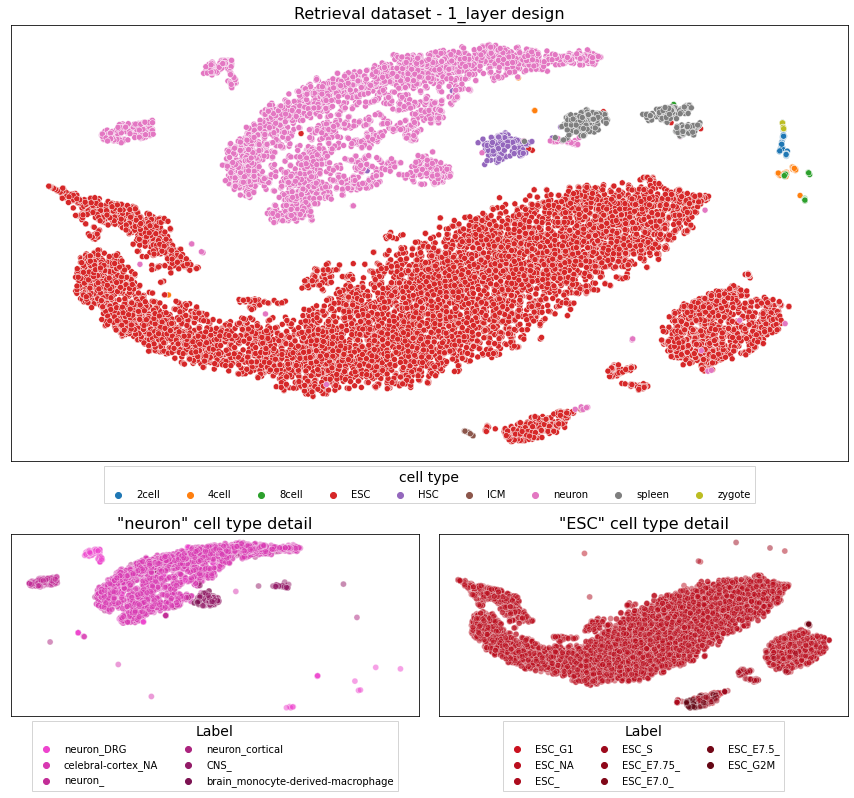

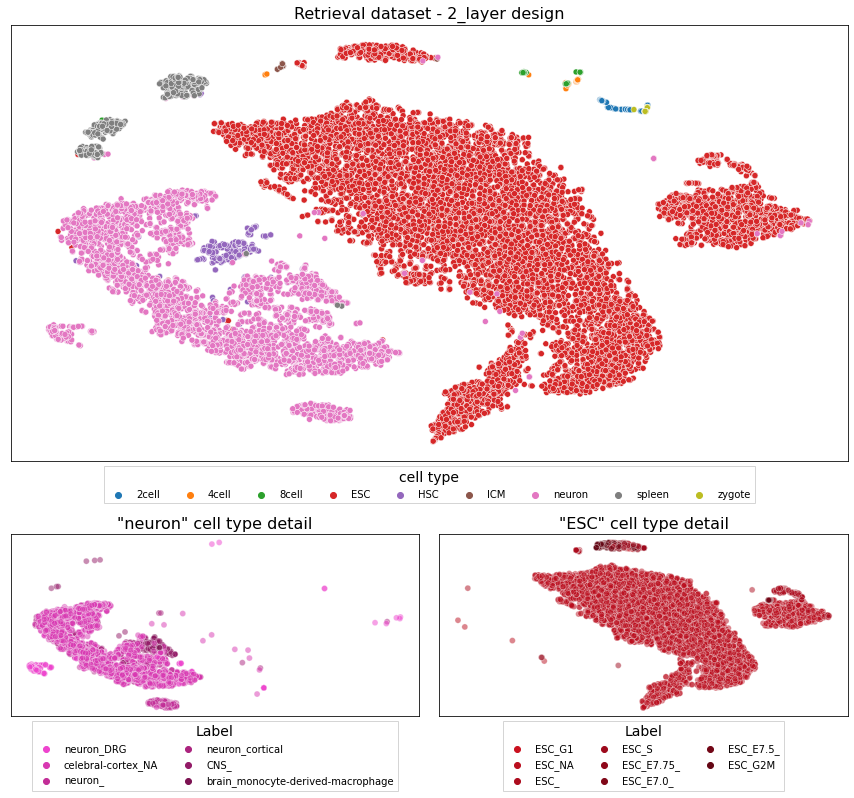

In [22]:
# design='a1'
np.random.seed(91)
pink_color=['#ee44ce','#d838b2','#c22d97','#ab237e','#931a67','#7c1252']
red_color=['#ca111f','#bb0e1e','#ac0b1d','#9d091c','#8f081a','#800718','#720616','#640614']
for i_design in ['1_layer','2_layer']:
    _, model_encoding = src.loading_model( glob.glob(os.path.join(loc_read, 'design_'+i_design+'_signaling*'))[0], -1)

    model_encoding.summary()
    print(i_design)
    
    encoding = model_encoding.predict(X)
    tsne = TSNE().fit_transform(encoding)

    df_encoding_tsne = df_encoding_tsne = pd.concat([pd.DataFrame(tsne, columns=['tsne1', 'tsne2'])
                                  , pd.DataFrame(np.array(y_ground_truth),columns=['cell_type'])], axis=1)
    sorter_index=dict(zip(sorted(set(df_retrieval['cell_type'])), range(len(set(df_retrieval['cell_type']))) ))
    df_encoding_tsne['order'] = df_encoding_tsne['cell_type'].map(sorter_index)
    df_encoding_tsne['Label'] = df_retrieval['Label'].values
    df_encoding_tsne
    
    
    fig = plt.figure(figsize=(15,12))
    ax1 = plt.subplot2grid((3, 2), (0, 0), colspan=2, rowspan=2)
    ax3 = plt.subplot2grid((3, 2), (2, 0), colspan=1)
    ax5 = plt.subplot2grid((3, 2), (2, 1), colspan=1)

    sns.scatterplot(data=df_encoding_tsne.sort_values(by='order')
                    , x='tsne1', y='tsne2', hue='cell_type', ax=ax1, alpha=1., marker="o")
    ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 0.0), title='cell type', fancybox=False, shadow=False, ncol=len(y_ground_truth.unique()));

    sns.scatterplot(data=df_encoding_tsne.loc[df_encoding_tsne['cell_type'].isin(['neuron'])].sort_values(by='order')
                    , x='tsne1', y='tsne2', hue='Label', ax=ax3, alpha=.5, marker="o", palette=pink_color)
    ax3.legend(loc='upper center', bbox_to_anchor=(.5, 0.0), title='Label', fancybox=False, shadow=False, ncol=2, fontsize=SMALL_SIZE)

    sns.scatterplot(data=df_encoding_tsne.loc[df_encoding_tsne['cell_type'].isin(['ESC'])].sort_values(by='order')
                    , x='tsne1', y='tsne2', hue='Label', ax=ax5, alpha=.5, marker="o", palette=red_color)
    ax5.legend(loc='upper center', bbox_to_anchor=(.5, 0.0), title='Label', fancybox=False, shadow=False, ncol=3, fontsize=SMALL_SIZE)

    for axes in [ax1,ax3,ax5]:
        axes.axes.xaxis.set_visible(False)
        axes.axes.yaxis.set_visible(False)

    # fig.suptitle('Neural Network Encoding', fontsize=14)
    ax1.set_title('Retrieval dataset - '+i_design+' design')#, fontdict={'fontsize': 10, 'fontweight': 'medium'})
    ax3.set_title('"neuron" cell type detail')#, fontdict={'fontsize': 10, 'fontweight': 'medium'})
    ax5.set_title('"ESC" cell type detail')#, fontdict={'fontsize': 10, 'fontweight': 'medium'})
    # plt.tight_layout()
    plt.subplots_adjust(left=0.125,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.05, 
                        hspace=0.4)

    plt.savefig(os.path.join(loc_mouse, 'mouse_enc_'+i_design+'.png'), dpi=300, bbox_inches = 'tight')
    plt.savefig(os.path.join(loc_mouse, 'mouse_enc_'+i_design+'.svg'), dpi=300, bbox_inches = 'tight')
    plt.savefig(os.path.join(loc_mouse, 'mouse_enc_'+i_design+'.pdf'), dpi=300, bbox_inches = 'tight')
    